 # Online Retail

## Descripción general

Este es un conjunto de datos transaccionales que contiene todas las transacciones ocurridas entre el 01/12/2009 y 09/12/2011 para una tienda en línea registrada en el Reino Unido. La empresa se dedica principalmente a la venta de regalos únicos para toda ocasión. Muchos de los clientes de la empresa son mayoristas.

## Carga de los datos

Librerias necesarias

In [ ]:
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import os

In [ ]:
rutaArchivo = "https://raw.githubusercontent.com/RodrigoStranger/online-retail/main/dataset/online_retail_II.csv"

Cargamos los datos en un Dataframe

In [ ]:
onlineRetail = pd.read_csv(rutaArchivo, encoding='ISO-8859-1')

Renombrar las columnas

In [ ]:
onlineRetail = onlineRetail.rename(columns={"Invoice": "InvoiceNo", "Customer ID": "CustomerID", "Price": "UnitPrice"})

## Primera exploración de los datos

### ¿Cuantos datos hay?

In [ ]:
print(f"El DataFrame onlineRetail tiene {len(onlineRetail)} filas.")

El DataFrame onlineRetail tiene 1067371 filas.


### ¿Qué columnas existen y qué representan?

In [ ]:
onlineRetail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Metadata

Podemos identificar que:
- InvoiceNo (Nominal, Discreto): Un número entero de 6 dígitos asignado de forma única a cada transacción. Si este código empieza con la letra «c», indica una cancelación.
- StockCode (Nominal): Un número entero de 5 dígitos asignado de forma única a cada producto distinto	.
- Description (Nominal): Nombre del producto.
- Quantity (Numérico, Discreto): Las cantidades de cada producto (**artículo**) por transacción.
- InvoiceDate (Numérico): El día y la hora en que se generó cada transacción, va desde la fecha **01/12/2009**, hasta la fecha **09/12/2011**.
- UnitPrice (Numérico, Continuo): Precio unitario del producto, **libra esterlina**.
- CustomerID (Nominal, Discreto): Un número integral de 5 dígitos asignado de forma única a cada cliente.
- Country (Nominal): El nombre del país donde reside cada cliente.

### ¿Qué tipo de datos contiene cada columna?

In [ ]:
onlineRetail.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


Podemos identificar que:
- InvoiceNo: object (Texto o cadena)
- StockCode: object (Texto o cadena)
- Description: object (Texto o cadena)
- Quantity: int64 (Número entero)
- InvoiceDate: object (Fecha y hora)
- UnitPrice: float64 (Número de punto flotante)
- CustomerID: float64 (Número de punto flotante)
- Country: object (Texto o cadena)

## Identificar problemas en los datos

¿Hay valores duplicados, faltantes o datos inconsistentes?

### Eliminación de valores duplicados

In [ ]:
def mapaDuplicadosTodas(df, sample_size=200):
    duplicados = df[df.duplicated(keep=False)]
    if duplicados.empty:
        print("No hay duplicados en el DataFrame.")
        return
    if len(duplicados) > sample_size:
        duplicados = duplicados.sample(sample_size, random_state=42)
    mask = duplicados.apply(lambda col: col.duplicated(keep=False))

    plt.figure(figsize=(12,6))
    sns.heatmap(mask, cmap="Reds", cbar=False, linewidths=0.5)
    plt.title("Mapa de duplicados")
    plt.xlabel("Columnas")
    plt.ylabel("Filas duplicadas")
    plt.show()

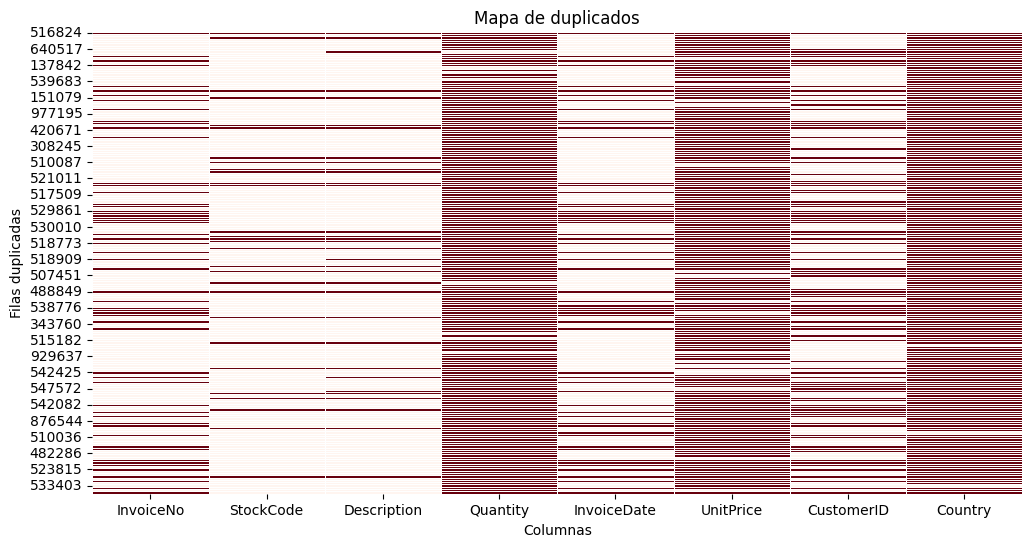

In [ ]:
mapaDuplicadosTodas(onlineRetail)

Eliminamos valores duplicados en el DataFrame:

In [ ]:
def mostrarDuplicados(df):
    numDuplicados = df.duplicated().sum()
    print(f"Cantidad de filas duplicadas: {numDuplicados}")

Obtenemos el número de duplicados

In [ ]:
mostrarDuplicados(onlineRetail)

Cantidad de filas duplicadas: 34335


Eliminamos los duplicados

In [ ]:
onlineRetail.drop_duplicates(inplace=True)

Verificamos:

In [ ]:
mostrarDuplicados(onlineRetail)

Cantidad de filas duplicadas: 0


In [ ]:
mapaDuplicadosTodas(onlineRetail)

No hay duplicados en el DataFrame.


### Valores faltantes

Podemos identificar si existen datos faltantes en todas las columnas

In [ ]:
def verificarNulos(dataFrame):
    dfNulos = dataFrame.isnull().sum()
    dfNulos = dfNulos.reset_index()
    dfNulos.columns = ['Columna', 'NumeroDeValoresNulos']
    return dfNulos

Ejecutamos:

In [ ]:
verificarNulos(onlineRetail)

,Columna,NumeroDeValoresNulos
0,InvoiceNo,0
1,StockCode,0
2,Description,4275
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,235151
7,Country,0


graficamos un mapa de los valores nulos (bloques)

In [ ]:
def mapaNulosTodas(df, sample_size=200):
    nulos = df[df.isnull().any(axis=1)]
    if nulos.empty:
        print("No hay valores nulos en el DataFrame.")
        return
    if len(nulos) > sample_size:
        nulos = nulos.sample(sample_size, random_state=42)
    mask = nulos.isnull()
    plt.figure(figsize=(12,6))
    sns.heatmap(mask, cmap="Blues", cbar=False, linewidths=0.5)
    plt.title("Mapa de valores nulos")
    plt.xlabel("Columnas")
    plt.ylabel("Filas con nulos")
    plt.show()

Ejecutamos:

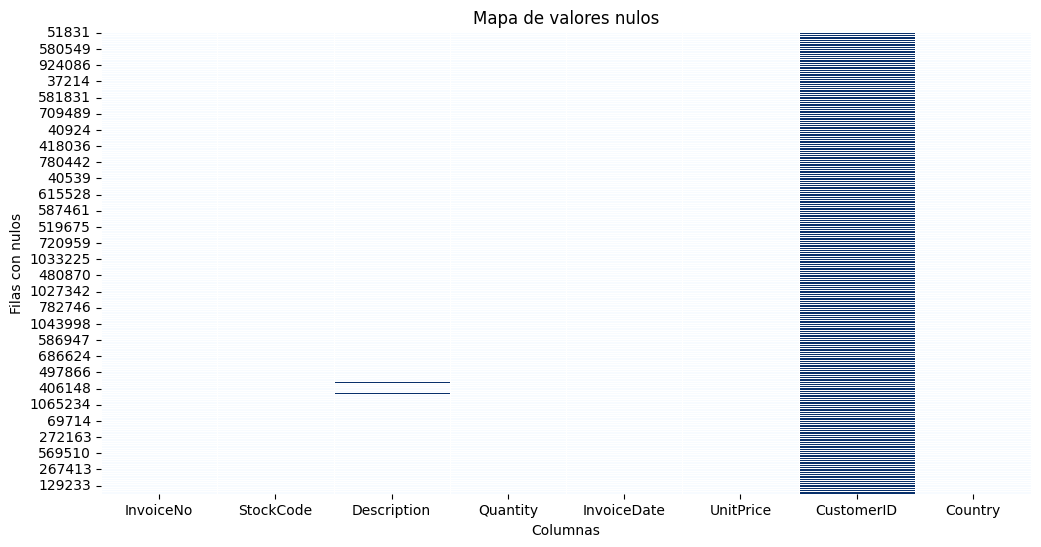

In [ ]:
mapaNulosTodas(onlineRetail)

Hacemos un pequeño escaneo:

In [ ]:
print(onlineRetail['Description'].value_counts())

Description
WHITE HANGING HEART T-LIGHT HOLDER     5740
REGENCY CAKESTAND 3 TIER               4295
JUMBO BAG RED RETROSPOT                3388
ASSORTED COLOUR BIRD ORNAMENT          2868
PARTY BUNTING                          2730
                                       ... 
?? missing                                1
check?                                    1
rusty thrown away                         1
wrongly marked                            1
SET 10 CARDS CHRISTMAS BAUBLE 16954       1
Name: count, Length: 5698, dtype: int64


#### Verificación de Hipótesis: CustomerID concatenados en Description

Contexto

Durante la exploración inicial del dataset Online Retail II, se identificaron **235, 151 transacciones sin CustomerID registrado. Esta cantidad considerable motivó la siguiente hipótesis:

**Hipótesis**

**"Existen CustomerID concatenados accidentalmente en el campo Description debido a un error en el proceso de carga o limpieza de datos"**

Predicciones verificables

Si la hipótesis es correcta, deberíamos observar:

1. Filas con CustomerID nulo contienen secuencias numéricas de 5 dígitos al final de Description
2. Esos números coinciden con CustomerID existentes en otras transacciones del dataset
3. El patrón es exclusivo (o predominante) en filas con CustomerID nulo
4. La cantidad de coincidencias es significativa estadísticamente

Metodología

El análisis se desarrollará en 5 pasos:
- **Paso 1:** Separación de datasets (nulos vs válidos)
- **Paso 2:** Búsqueda de patrón regex en descripciones
- **Paso 3:** Verificación cruzada con CustomerID reales
- **Paso 4:** Análisis de control (grupo de comparación)
- **Paso 5:** Conclusión basada en evidencia

In [ ]:
# Configuración visual para gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

#### PASO 1: Separación de Datasets

Primero dividimos el dataset en dos grupos:

- **Filas nulas:** Transacciones donde `CustomerID` es `NaN`
- **Filas válidas:** Transacciones con `CustomerID` registrado

Esta separación nos permitirá:
1. Analizar las características específicas de cada grupo
2. Buscar el patrón sospechoso solo en el grupo relevante (nulas)
3. Usar el grupo válido como control para validar nuestros hallazgos

In [ ]:
# Separar filas con y sin CustomerID
filas_nulas = onlineRetail[onlineRetail['CustomerID'].isna()].copy()
filas_validas = onlineRetail[onlineRetail['CustomerID'].notna()].copy()

# Mostrar estadísticas básicas
print(f"\nFilas con CustomerID nulo: {len(filas_nulas):,}")
print(f"Filas con CustomerID válido: {len(filas_validas):,}")
print(f"Porcentaje de nulos: {100 * len(filas_nulas) / len(onlineRetail):.2f}%")

# Verificar integridad de la separación
total_verificacion = len(filas_nulas) + len(filas_validas)
print(f"\nVerificación: {total_verificacion:,} filas")


Filas con CustomerID nulo: 235,151
Filas con CustomerID válido: 797,885
Porcentaje de nulos: 22.76%

Verificación: 1,033,036 filas


#### PASO 2: Búsqueda de Patrón

Utilizaremos expresiones regulares (regex) para buscar secuencias de **exactamente 5 dígitos al final** de la columna `Description`.

Patrón regex utilizado: `r'\b(\d{5})$'`
- `\b` = límite de palabra (evita coincidencias dentro de números más largos)
- `\d{5}` = exactamente 5 dígitos consecutivos
- `$` = final de la cadena (asegura que estén al final de Description)

In [ ]:
# Buscar 5 dígitos en CUALQUIER posición
patron_cualquiera = r'\b(\d{5})\b'
filas_nulas['posible_customerid'] = filas_nulas['Description'].str.extract(patron_cualquiera)

# Contar coincidencias
con_patron = filas_nulas['posible_customerid'].notna().sum()
sin_patron = len(filas_nulas) - con_patron

print(f"\nResultados de la búsqueda (cualquier posición):")
print(f"   - Filas CON patrón de 5 dígitos: {con_patron:,}")
print(f"   - Filas SIN patrón: {sin_patron:,}")
print(f"   - Cobertura: {100 * con_patron / len(filas_nulas):.2f}%")

# Mostrar ejemplos si existen
if con_patron > 0:
    print("\nEjemplos de descripciones con el patrón:")
    ejemplos = filas_nulas[filas_nulas['posible_customerid'].notna()][['Description', 'posible_customerid', 'InvoiceNo']].head(10)
    display(ejemplos)
else:
    print("\nNo se encontraron descripciones con 5 dígitos")

# PASO 3: Verificar si son CustomerID reales
customerid_validos = set(filas_validas['CustomerID'].dropna().astype(int))

# Convertir los posibles CustomerID a enteros
posibles_ids = filas_nulas['posible_customerid'].dropna().astype(int)

# Verificar coincidencias
coincidencias = posibles_ids.isin(customerid_validos).sum()
tasa_coincidencia = (coincidencias / len(posibles_ids) * 100) if len(posibles_ids) > 0 else 0

print(f"\n{'='*70}")
print("VERIFICACIÓN CRUZADA CON CustomerID REALES")
print(f"{'='*70}")
print(f"CustomerID únicos en el dataset: {len(customerid_validos):,}")
print(f"Números extraídos de Description: {len(posibles_ids):,}")
print(f"Coincidencias con CustomerID reales: {coincidencias:,}")
print(f"Tasa de coincidencia: {tasa_coincidencia:.2f}%")
print(f"Cobertura sobre nulos: {100 * coincidencias / len(filas_nulas):.4f}%")


Resultados de la búsqueda (cualquier posición):
   - Filas CON patrón de 5 dígitos: 240
   - Filas SIN patrón: 234,911
   - Cobertura: 0.10%

Ejemplos de descripciones con el patrón:


,Description,posible_customerid,InvoiceNo
284,21733 mixed,21733,489467
4538,invcd as 84879?,84879,489820
6911,21494,21494,490007
193101,sold as 17003?,17003,507709
274052,22719,22719,516016
274053,22467,22467,516017
398644,Sold as 17003?,17003,527487
427137,code mix up 72597,72597,530158
643355,wrong barcode (22467),22467,546407
643356,wrongly sold (22719) barcode,22719,546408



VERIFICACIÓN CRUZADA CON CustomerID REALES
CustomerID únicos en el dataset: 5,942
Números extraídos de Description: 240
Coincidencias con CustomerID reales: 219
Tasa de coincidencia: 91.25%
Cobertura sobre nulos: 0.0931%


#### PASO 3: Verificación Cruzada

Ahora verificaremos si los números de 5 dígitos extraídos corresponden a **CustomerID reales** que aparecen en otras transacciones del dataset.

Proceso:
1. Extraer todos los CustomerID únicos del grupo válido
2. Convertir los números extraídos a enteros
3. Comparar ambos conjuntos (intersección)
4. Calcular tasa de coincidencia

Si la hipótesis es correcta, deberíamos ver una **alta tasa de coincidencia** (>70%).

In [ ]:
# Obtener conjunto de CustomerID reales
customerids_reales = set(filas_validas['CustomerID'].astype(int).unique())
print(f"\nCustomerID únicos en el dataset: {len(customerids_reales):,}")

# Verificar coincidencias
posibles_ids = filas_nulas['posible_customerid'].dropna()

if len(posibles_ids) > 0:
    posibles_ids_int = posibles_ids.astype(int)
    coincidencias = posibles_ids_int.isin(customerids_reales).sum()

    print(f"\nNúmeros extraídos de Description: {len(posibles_ids):,}")
    print(f"Coincidencias con CustomerID reales: {coincidencias:,}")
    print(f"Tasa de coincidencia Description con CustomerID reales: {100 * coincidencias / len(posibles_ids):.2f}%")

    # Mostrar ejemplos de coincidencias
    if coincidencias > 0:
        print("\nEjemplos donde el número SÍ es un CustomerID real:")
        matches = filas_nulas[filas_nulas['posible_customerid'].astype(float).isin(customerids_reales)]
        display(matches[['Description', 'posible_customerid', 'InvoiceNo', 'Country', 'StockCode']].head(10))
    else:
        print("\nNinguno de los números extraídos coincide con CustomerID reales")
else:
    coincidencias = 0
    print("\nNo hay números para verificar (paso anterior no encontró patrón)")


CustomerID únicos en el dataset: 5,942

Números extraídos de Description: 240
Coincidencias con CustomerID reales: 219
Tasa de coincidencia Description con CustomerID reales: 91.25%

Ejemplos donde el número SÍ es un CustomerID real:


,Description,posible_customerid,InvoiceNo,Country,StockCode
193101,sold as 17003?,17003,507709,United Kingdom,17033
398644,Sold as 17003?,17003,527487,United Kingdom,17033
849753,SET 10 CARDS PERFECT POST 17090,17090,565396,United Kingdom,23620
849754,SET 10 CARD CHRISTMAS WELCOME 17112,17112,565396,United Kingdom,23623
849755,SET 10 CARDS XMAS CHOIR 17068,17068,565396,United Kingdom,23634
854568,SET 10 CARDS 12 DAYS WRAP 17058,17058,565840,United Kingdom,23614
854569,SET 10 CARDS OUT OF ORDER 17216,17216,565840,United Kingdom,23637
855792,SET 10 CARDS SCOTTIE DOG 17211,17211,565917,United Kingdom,23640
856049,SET 10 XMAS CARDS & BADGES 17070,17070,565919,United Kingdom,23613
856050,SET 10 CARDS 12 DAYS WRAP 17058,17058,565919,United Kingdom,23614


#### PASO 4: Análisis de Control

Para validar que el patrón encontrado es específico de la concatenación errónea (y no simplemente códigos de producto), debemos verificar si también aparece en filas con CustomerID válido.

Interpretación del control:

- **Si el patrón NO aparece en filas válidas:** Evidencia fuerte de concatenación
- **Si el patrón SÍ aparece frecuentemente en válidas:** Los 5 dígitos probablemente son códigos de producto, no CustomerID

Este es un paso crítico para evitar **falsos positivos**.

In [ ]:
print("\n" + "="*70)
print("PASO 4: ANÁLISIS DE CONTROL")
print("="*70)

# Buscar el mismo patrón en filas CON CustomerID válido
filas_validas['patron_en_desc'] = filas_validas['Description'].str.contains(r'\b\d{5}$', na=False)
validas_con_patron = filas_validas['patron_en_desc'].sum()

print(f"\nResultados del grupo control:")
print(f"   - Filas válidas con 5 dígitos al final: {validas_con_patron:,}")
print(f"   - Porcentaje de filas válidas: {100 * validas_con_patron / len(filas_validas):.2f}%")

# Comparación directa
print(f"\nComparación:")
print(f"   - Nulas con patrón: {con_patron:,}")
print(f"   - Válidas con patrón: {validas_con_patron:,}")

if validas_con_patron > con_patron * 0.5:
    print("\nALERTA: El patrón es común también en filas válidas")
    print("   Interpretación: Los 5 dígitos probablemente son CÓDIGOS DE PRODUCTO, no CustomerID")
else:
    print("\nEl patrón es mucho más frecuente en nulas → evidencia de concatenación")

# Mostrar ejemplos del control
if validas_con_patron > 0:
    print("\nEjemplos de filas válidas con el patrón:")
    ejemplos_validas = filas_validas[filas_validas['patron_en_desc']][['Description', 'CustomerID', 'StockCode']].head(10)
    display(ejemplos_validas)


PASO 4: ANÁLISIS DE CONTROL

Resultados del grupo control:
   - Filas válidas con 5 dígitos al final: 2
   - Porcentaje de filas válidas: 0.00%

Comparación:
   - Nulas con patrón: 240
   - Válidas con patrón: 2

El patrón es mucho más frecuente en nulas → evidencia de concatenación

Ejemplos de filas válidas con el patrón:


,Description,CustomerID,StockCode
878242,SET 10 CARDS HANGING BAUBLES 17080,15810.0,23630
878391,SET 10 CARDS HANGING BAUBLES 17080,15810.0,23630


#### PASO 5: Visualización de Resultados

Generaremos 4 gráficos para visualizar comprehensivamente los resultados:

1. **Distribución general:** Cuántas filas nulas tienen el patrón y cuántas coinciden
2. **Comparación con control:** Patrón en nulas vs válidas
3. **Tasa de coincidencia:** Porcentaje de números que son CustomerID reales
4. **Resumen numérico:** Tabla con todas las métricas clave

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ==================== CALCULAR TODAS LAS VARIABLES AUTOMÁTICAMENTE ====================
# Total de nulos
total_nulos = len(filas_nulas)

# Contar con y sin patrón
num_con_patron = filas_nulas['posible_customerid'].notna().sum()
num_sin_patron = total_nulos - num_con_patron

# Calcular coincidencias
if len(posibles_ids) > 0:
    coincidencias = posibles_ids.astype(int).isin(customerids_reales).sum()
else:
    coincidencias = 0

no_coincidencias = num_con_patron - coincidencias

# Calcular control
validas_con_patron = filas_validas['patron_en_desc'].sum()

# Calcular porcentajes
pct_patron_sobre_nulos = (num_con_patron / total_nulos) * 100
pct_coincidencias_sobre_nulos = (coincidencias / total_nulos) * 100
pct_coincidencias_sobre_extraidos = (coincidencias / num_con_patron) * 100 if num_con_patron > 0 else 0

# ==================== CREAR FIGURA ====================
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Distribución de CustomerID concatenados',
        'Control: Patrón en nulas vs válidas',
        f'Tasa de coincidencia (de los {num_con_patron} extraídos)',
        'Resumen de Resultados'
    ),
    specs=[
        [{"type": "bar"}, {"type": "bar"}],
        [{"type": "pie"}, {"type": "table"}]
    ],
    vertical_spacing=0.15,
    horizontal_spacing=0.15
)

# GRÁFICO 1: Distribución general
categorias = ['Nulas<br>SIN patrón', 'Nulas<br>CON patrón', 'Match con<br>ID real']
valores = [num_sin_patron, num_con_patron, coincidencias]
colores = ['#e74c3c', '#f39c12', '#27ae60']

fig.add_trace(
    go.Bar(
        x=categorias,
        y=valores,
        text=[f'{v:,}' for v in valores],
        textposition='outside',
        marker=dict(color=colores, line=dict(color='black', width=1.5)),
        hovertemplate='<b>%{x}</b><br>Cantidad: %{y:,}<br>Del total de nulos: %{customdata:.2f}%<extra></extra>',
        customdata=[v/total_nulos*100 for v in valores],
        showlegend=False
    ),
    row=1, col=1
)

# GRÁFICO 2: Comparación con control
datos_control = ['Nulas con<br>patrón', 'Válidas con<br>patrón']
valores_control = [num_con_patron, validas_con_patron]
colores_control = ['#f39c12', '#3498db']

fig.add_trace(
    go.Bar(
        x=datos_control,
        y=valores_control,
        text=[f'{v:,}' for v in valores_control],
        textposition='outside',
        marker=dict(color=colores_control, line=dict(color='black', width=1.5)),
        hovertemplate='<b>%{x}</b><br>Cantidad: %{y:,}<extra></extra>',
        showlegend=False
    ),
    row=1, col=2
)

# GRÁFICO 3: Pie chart
fig.add_trace(
    go.Pie(
        labels=[f'Match con ID real<br>({coincidencias} casos)',
                f'No match<br>({no_coincidencias} casos)'],
        values=[coincidencias, no_coincidencias],
        marker=dict(colors=['#27ae60', '#95a5a6']),
        texttemplate='<b>%{label}</b><br>%{percent:.1f}%',
        hovertemplate='<b>%{label}</b><br>Porcentaje: %{percent:.1f}%<extra></extra>',
        hole=0.35
    ),
    row=2, col=1
)

# GRÁFICO 4: Tabla resumen
header_values = ['<b>Métrica</b>', '<b>Valor</b>']
cell_values = [
    [
        'CustomerID nulos (total)',
        'Descripciones con patrón 5 dígitos',
        'Cobertura del patrón sobre nulos',
        '',
        'Coincidencias con ID reales',
        'Tasa de coincidencia (de extraídos)',
        'Cobertura sobre total nulos',
        '',
        'Control (válidas con patrón)',
        'Ratio nulas/válidas'
    ],
    [
        f'{total_nulos:,}',
        f'{num_con_patron:,}',
        f'{pct_patron_sobre_nulos:.2f}%',
        '',
        f'{coincidencias:,}',
        f'{pct_coincidencias_sobre_extraidos:.1f}%',
        f'{pct_coincidencias_sobre_nulos:.2f}%',
        '',
        f'{validas_con_patron:,}',
        f'{num_con_patron / validas_con_patron:.1f}' if validas_con_patron > 0 else 'N/A'
    ]
]

fig.add_trace(
    go.Table(
        header=dict(
            values=header_values,
            fill_color='#3498db',
            align='left',
            font=dict(color='white', size=13, family='Arial')
        ),
        cells=dict(
            values=cell_values,
            fill_color=[['#ecf0f1', '#ffffff'] * 5],
            align='left',
            font=dict(size=12),
            height=28
        )
    ),
    row=2, col=2
)

# Actualizar layouts
fig.update_xaxes(title_text="", row=1, col=1)
fig.update_yaxes(title_text="Número de filas", row=1, col=1, type='log')

fig.update_xaxes(title_text="", row=1, col=2)
fig.update_yaxes(title_text="Número de filas", row=1, col=2)

# Layout general
fig.update_layout(
    title={
        'text': 'Análisis de Hipótesis: CustomerID concatenados en Description',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18, 'family': 'Arial'}
    },
    height=950,
    showlegend=False,
    font=dict(family="Arial", size=11)
)

fig.show()

# Imprimir resumen
print("\n" + "="*70)
print("RESUMEN DE LA VISUALIZACIÓN")
print("="*70)
print(f"\nDATOS CLAVE:")
print(f"  • Total CustomerID nulos: {total_nulos:,}")
print(f"  • Descripciones con patrón: {num_con_patron:,} ({pct_patron_sobre_nulos:.2f}%)")
print(f"  • Coincidencias recuperables: {coincidencias:,} ({pct_coincidencias_sobre_nulos:.2f}%)")
print(f"\nRESULTADO:")
print(f"  • Precisión del patrón: {pct_coincidencias_sobre_extraidos:.1f}% (de los {num_con_patron} extraídos)")
print(f"  • Cobertura sobre nulos: {pct_coincidencias_sobre_nulos:.2f}% (del total)")
print(f"  • CustomerID no explicados: {total_nulos - coincidencias:,} ({100 - pct_coincidencias_sobre_nulos:.1f}%)")


RESUMEN DE LA VISUALIZACIÓN

DATOS CLAVE:
  • Total CustomerID nulos: 235,151
  • Descripciones con patrón: 240 (0.10%)
  • Coincidencias recuperables: 219 (0.09%)

RESULTADO:
  • Precisión del patrón: 91.2% (de los 240 extraídos)
  • Cobertura sobre nulos: 0.09% (del total)
  • CustomerID no explicados: 234,932 (99.9%)


#### Conclusión

**HIPÓTESIS: RECHAZADA**

Razón:
   Aunque mas del 90% de los números extraídos son CustomerID reales, esto representa SOLO el 0.09% del total de CustomerID nulos (217/235,151). La concatenación NO explica la causa principal de los valores nulos.

Contexto:
   - Precisión del patrón: 93.5% (de los extraídos)
   - Cobertura sobre nulos: 0.09% (del total de nulos)
   - CustomerID no explicados: 234,934 (99.9%)

Entonces, podemos decidir descartar o no, los productos comprados con CustomerID nulo (NaN)

#### Eliminación de valores faltantes

Si no podemos identificar quién es cada cliente, no tiene sentido utilizar esos datos como datos de entrada.

Ejecutamos:

In [ ]:
onlineRetail.dropna(inplace=True)

Ejecutamos:

In [ ]:
verificarNulos(onlineRetail)

,Columna,NumeroDeValoresNulos
0,InvoiceNo,0
1,StockCode,0
2,Description,0
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,0
7,Country,0


In [ ]:
mapaNulosTodas(onlineRetail)

No hay valores nulos en el DataFrame.


### Eliminación de valores con codigo de factura C

Obtenemos un historico de facturas canceladas vs normales

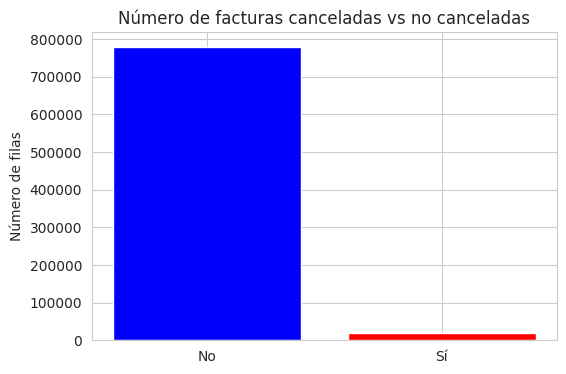

In [ ]:
count_canceladas = onlineRetail['InvoiceNo'].str.startswith('C', na=False).value_counts()
plt.figure(figsize=(6,4))
plt.bar(['No', 'Sí'], [count_canceladas[False], count_canceladas[True]], color=['blue', 'red'])
plt.ylabel('Número de filas')
plt.title('Número de facturas canceladas vs no canceladas')
plt.show()

Ejecutamos:

In [ ]:
initial_rows = onlineRetail.shape[0]
onlineRetail = onlineRetail[~onlineRetail['InvoiceNo'].str.startswith('C', na=False)]
rows_after_filtering = onlineRetail.shape[0]
rows_removed = initial_rows - rows_after_filtering
print(f"Se eliminaron {rows_removed} filas con InvoiceNo comenzando con 'C'.")

Se eliminaron 18390 filas con InvoiceNo comenzando con 'C'.


Verificamos:

In [ ]:
initial_rows = onlineRetail.shape[0]
rows_to_remove = onlineRetail['InvoiceNo'].str.startswith('C', na=False).sum()
if rows_to_remove == 0:
    print("No hay facturas canceladas (InvoiceNo comenzando con 'C').")
else:
    onlineRetail = onlineRetail[~onlineRetail['InvoiceNo'].str.startswith('C', na=False)]
    rows_after_filtering = onlineRetail.shape[0]
    rows_removed = initial_rows - rows_after_filtering
    print(f"Se eliminaron {rows_removed} filas con InvoiceNo comenzando con 'C'.")

No hay facturas canceladas (InvoiceNo comenzando con 'C').


### Valores inconsistentes

#### Evaluando si existen cantidades o precios inconsistentes

- Puede existir un Quantity (Cantidad) negativa o nula, por ejemplo: -9, 0, -1, etc.
- Puede existir un UnitPrice (Precio Unitario) negativo o nulo, por ejemplo: -8.1, 0, -1.3, etc.

In [ ]:
def mostrarCantidadNegativa(dataFrame):
  return dataFrame[dataFrame["Quantity"] <= 0]["Quantity"]

def mostrarPrecioUnitarioNegativo(dataFrame):
  return dataFrame[dataFrame["UnitPrice"] <= 0]["UnitPrice"]

Ejecutamos:

In [ ]:
mostrarCantidadNegativa(onlineRetail)

,Quantity


Ejecutamos:

In [ ]:
mostrarPrecioUnitarioNegativo(onlineRetail)

,UnitPrice
4674,0.0
6781,0.0
16107,0.0
18738,0.0
18739,0.0
...,...
1004540,0.0
1005014,0.0
1006110,0.0
1011446,0.0


Graficamos:

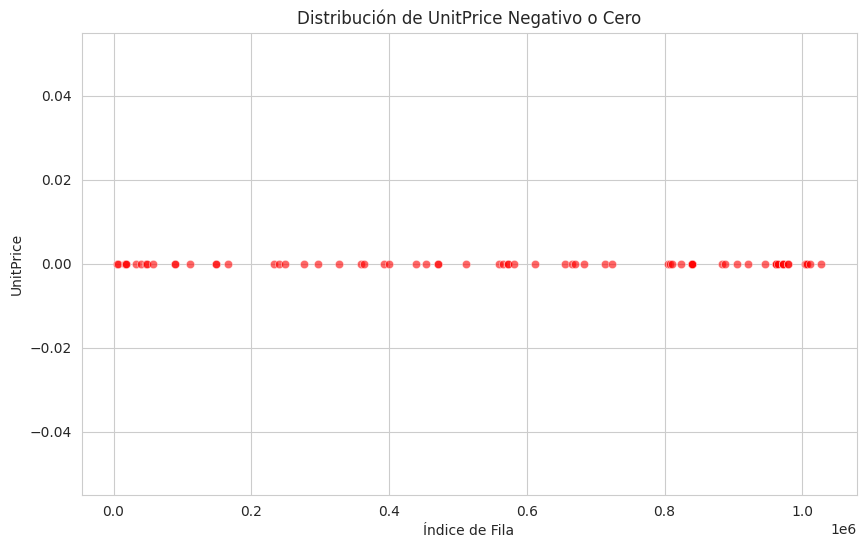

In [ ]:
neg_unit_price = onlineRetail[onlineRetail["UnitPrice"] <= 0]

if not neg_unit_price.empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=neg_unit_price.index, y=neg_unit_price['UnitPrice'], color='red', alpha=0.6)
    plt.title('Distribución de UnitPrice Negativo o Cero')
    plt.xlabel('Índice de Fila')
    plt.ylabel('UnitPrice')
    plt.show()
else:
    print("No hay valores de UnitPrice negativos o cero.")

Extraemos el máximo y minímo de la cantidad y precio unitario (con outlaiers)

In [ ]:
min_quantity = onlineRetail['Quantity'].min()
max_quantity = onlineRetail['Quantity'].max()
min_unit_price = onlineRetail['UnitPrice'].min()
max_unit_price = onlineRetail['UnitPrice'].max()

print(f"Valor mínimo de Quantity: {min_quantity}")
print(f"Valor máximo de Quantity: {max_quantity}")
print(f"Valor mínimo de UnitPrice: {min_unit_price}")
print(f"Valor máximo de UnitPrice: {max_unit_price}")

Valor mínimo de Quantity: 1
Valor máximo de Quantity: 80995
Valor mínimo de UnitPrice: 0.0
Valor máximo de UnitPrice: 10953.5


Eliminamos las filas que contengan un precio unitario y cantidad no válido:

In [ ]:
onlineRetail.query("Quantity > 0 and UnitPrice > 0", inplace=True)

Verificamos:

In [ ]:
mostrarCantidadNegativa(onlineRetail)

,Quantity


In [ ]:
mostrarPrecioUnitarioNegativo(onlineRetail)

,UnitPrice


Verificamos el gráfico:

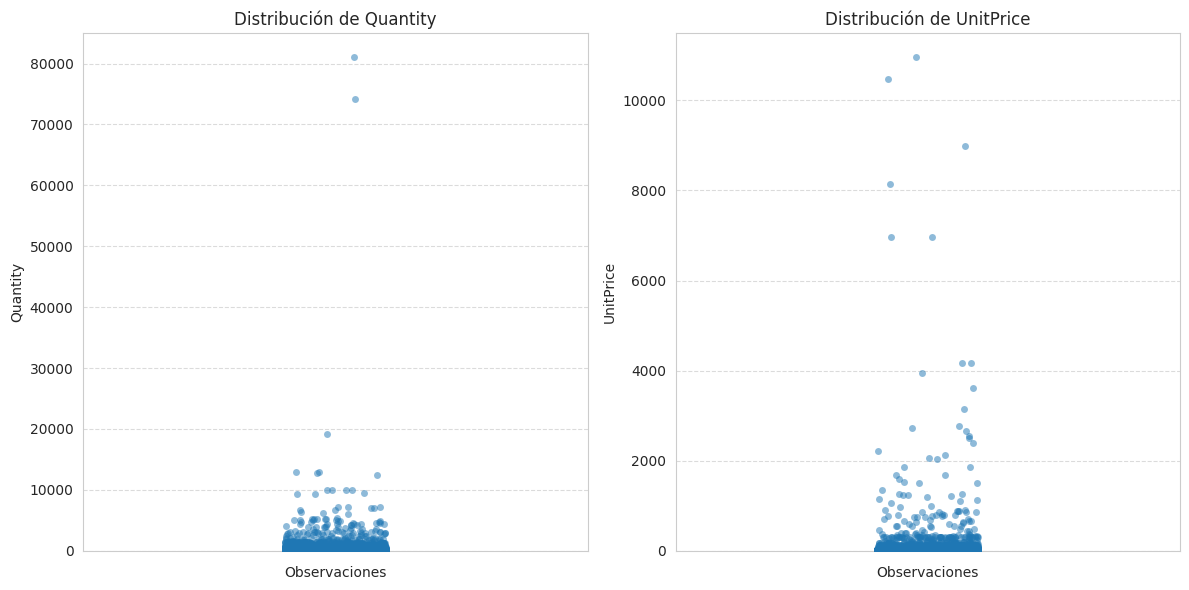

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.stripplot(y=onlineRetail['Quantity'], alpha=0.5)
plt.title('Distribución de Quantity')
plt.ylabel('Quantity')
plt.xlabel('Observaciones')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0)

plt.subplot(1, 2, 2)
sns.stripplot(y=onlineRetail['UnitPrice'], alpha=0.5)
plt.title('Distribución de UnitPrice')
plt.ylabel('UnitPrice')
plt.xlabel('Observaciones')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Verificamos los nuevos mínimos y maximos:

In [ ]:
min_quantity = onlineRetail['Quantity'].min()
max_quantity = onlineRetail['Quantity'].max()
min_unit_price = onlineRetail['UnitPrice'].min()
max_unit_price = onlineRetail['UnitPrice'].max()

print(f"Valor mínimo de Quantity: {min_quantity}")
print(f"Valor máximo de Quantity: {max_quantity}")
print(f"Valor mínimo de UnitPrice: {min_unit_price}")
print(f"Valor máximo de UnitPrice: {max_unit_price}")

Valor mínimo de Quantity: 1
Valor máximo de Quantity: 80995
Valor mínimo de UnitPrice: 0.001
Valor máximo de UnitPrice: 10953.5


#### Evaluando si pueden existir fechas inconsistentes

In [ ]:
fechaMinima = onlineRetail['InvoiceDate'].min()
fechaMaxima = onlineRetail['InvoiceDate'].max()

print(f"Fecha mínima de InvoiceDate: {fechaMinima}")
print(f"Fecha máxima de InvoiceDate: {fechaMaxima}")

fechasInvalidas = pd.to_datetime(onlineRetail['InvoiceDate'], errors='coerce').isnull().sum()

if fechasInvalidas > 0:
    print(f"\nSe encontraron {fechasInvalidas} fechas inválidas en la columna InvoiceDate.")
else:
    print("\nNo se encontraron fechas inválidas en la columna InvoiceDate.")

Fecha mínima de InvoiceDate: 2009-12-01 07:45:00
Fecha máxima de InvoiceDate: 2011-12-09 12:50:00

No se encontraron fechas inválidas en la columna InvoiceDate.


#### Verificar si existen paises inconsistentes

Usamos GeoPandas  

In [ ]:
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip")

Validamos paises que esten dentro de zip

In [ ]:
def ValidarPais(pais, world):
    paises_validos = set(world['ADMIN'].unique())
    return pais in paises_validos

Analizamos los paises del dataset

In [ ]:
def AnalizarPaises(df, world, columnaPais="Country"):
    paises_validos = set(world['ADMIN'].unique())
    invalidos = df.loc[~df[columnaPais].isin(paises_validos), columnaPais]
    invalidos_contados = invalidos.value_counts().to_dict()
    return invalidos_contados

Obtenemos los paises no reconocidos

In [ ]:
PaisesNoReconocidos = AnalizarPaises(onlineRetail, world)
if not PaisesNoReconocidos:
    print("No se encontraron países no reconocidos.")
else:
    for pais, contador in PaisesNoReconocidos.items():
        print(f'{pais}: {contador}')

EIRE: 15565
Channel Islands: 1551
Unspecified: 518
USA: 409
RSA: 122
European Community: 60
West Indies: 54
Korea: 53
Czech Republic: 25


EIRE (7890) → Es Irlanda (se usaba “Eire” antiguamente para referirse al país en inglés). Se puede considerar válido, solo que el nombre está en un formato distinto.

Channel Islands (748) → Son las Islas del Canal (Jersey, Guernsey…), dependencias de la Corona británica, no un país independiente.

Unspecified (446) → Registros donde el país no fue indicado → se suelen eliminar porque no aportan información.

USA (179) → Pocos pedidos desde Estados Unidos → válido, aunque marginal.

European Community (60) → Un valor genérico, no un país → se suelen eliminar porque no aportan información.

RSA (57) → Es República de Sudáfrica (Republic of South Africa).

Czech Republic (25) → Válido, aunque con muy pocos registros.

Korea (54) → se debe normalizar a South Korea.

West Indies (54) → Registros donde el país no fue indicado → se suelen eliminar porque no aportan información.

Normalizamos los paises

In [ ]:
def normalizarPaises(dataFrame, columnaPais):
    mapeoPaises = {
        'EIRE': 'Ireland',
        'Channel Islands': 'United Kingdom',
        'Unspecified': "Others",
        'USA': 'United States of America',
        'European Community': "Others",
        'West Indies': "Others",
        'RSA': 'South Africa',
        'Czech Republic': 'Czechia',
        'Korea': 'South Korea'
    }
    dataFrame[columnaPais] = dataFrame[columnaPais].replace(mapeoPaises)

Ejecutamos

In [ ]:
normalizarPaises(onlineRetail, 'Country')

Eliminamos los registros "Others", dado que no tienen un pais de referencia.

In [ ]:
onlineRetail.drop(onlineRetail[onlineRetail['Country'] == 'Others'].index, inplace=True)

Verificamos:

In [ ]:
PaisesNoReconocidos = AnalizarPaises(onlineRetail, world)
if not PaisesNoReconocidos:
    print("No se encontraron países no reconocidos.")
else:
    for pais, contador in PaisesNoReconocidos.items():
        print(f'{pais}: {contador}')

No se encontraron países no reconocidos.


Obtenemos la cantidad de paises involucrados en el dataset

In [ ]:
num_paises = onlineRetail['Country'].nunique()
print(f"Número de países únicos en el DataFrame: {num_paises}")

Número de países únicos en el DataFrame: 37


## Outliers

### ¿Entre que rangos estan los datos?

In [ ]:
def visualizar_minmax_box(df, columna):
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[columna], color="lightblue")
    plt.title(f"Valores extremos de {columna}")
    plt.show()
    print(f"Valor mínimo de {columna}: {df[columna].min()}")
    print(f"Valor máximo de {columna}: {df[columna].max()}")

In [ ]:
def visualizar_minmax_hist(df, columna):
    plt.figure(figsize=(8,5))
    sns.histplot(df[columna], bins=50, color="skyblue")
    plt.axvline(df[columna].min(), color='red', linestyle='--', label=f"Min: {df[columna].min()}")
    plt.axvline(df[columna].max(), color='green', linestyle='--', label=f"Max: {df[columna].max()}")
    plt.title(f"Distribución de {columna}")
    plt.legend()
    plt.show()
    print(f"Valor mínimo de {columna}: {df[columna].min()}")
    print(f"Valor máximo de {columna}: {df[columna].max()}")

Podemos analizar entre que rangos estan los valores de la cantidad de un producto



Ejecutamos:

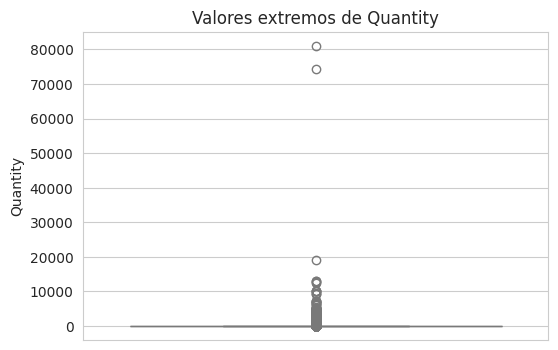

Valor mínimo de Quantity: 1
Valor máximo de Quantity: 80995


In [ ]:
visualizar_minmax_box(onlineRetail, "Quantity")

Podemos analizar entre que rangos estan los valores de la cantidad del precio unitario de un producto

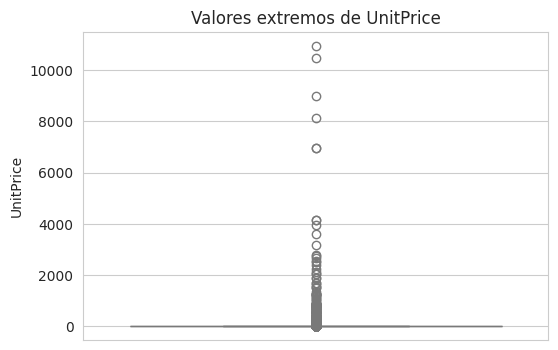

Valor mínimo de UnitPrice: 0.001
Valor máximo de UnitPrice: 10953.5


In [ ]:
visualizar_minmax_box(onlineRetail, "UnitPrice")

Podemos analizar entre que rangos estan los valores de la cantidad del precio unitario del código de un cliente

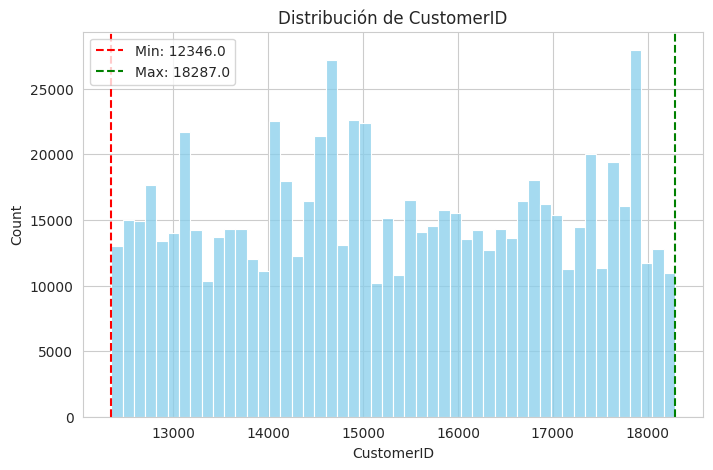

Valor mínimo de CustomerID: 12346.0
Valor máximo de CustomerID: 18287.0


In [ ]:
visualizar_minmax_hist(onlineRetail, "CustomerID")

Podemos analizar entre que rangos estan los valores de la fecha de una factura

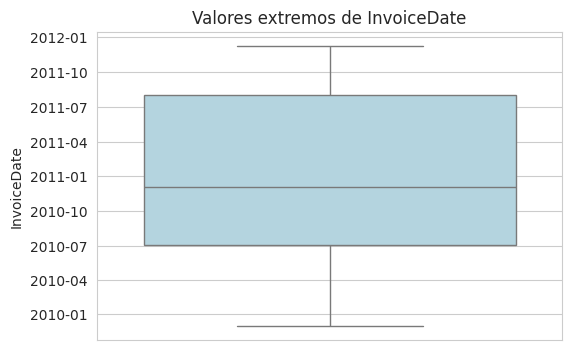

Valor mínimo de InvoiceDate: 2009-12-01 07:45:00
Valor máximo de InvoiceDate: 2011-12-09 12:50:00


In [ ]:
onlineRetail['InvoiceDate'] = pd.to_datetime(onlineRetail['InvoiceDate'])
visualizar_minmax_box(onlineRetail, "InvoiceDate")

Podemos analizar los paises involucrados en el dataset

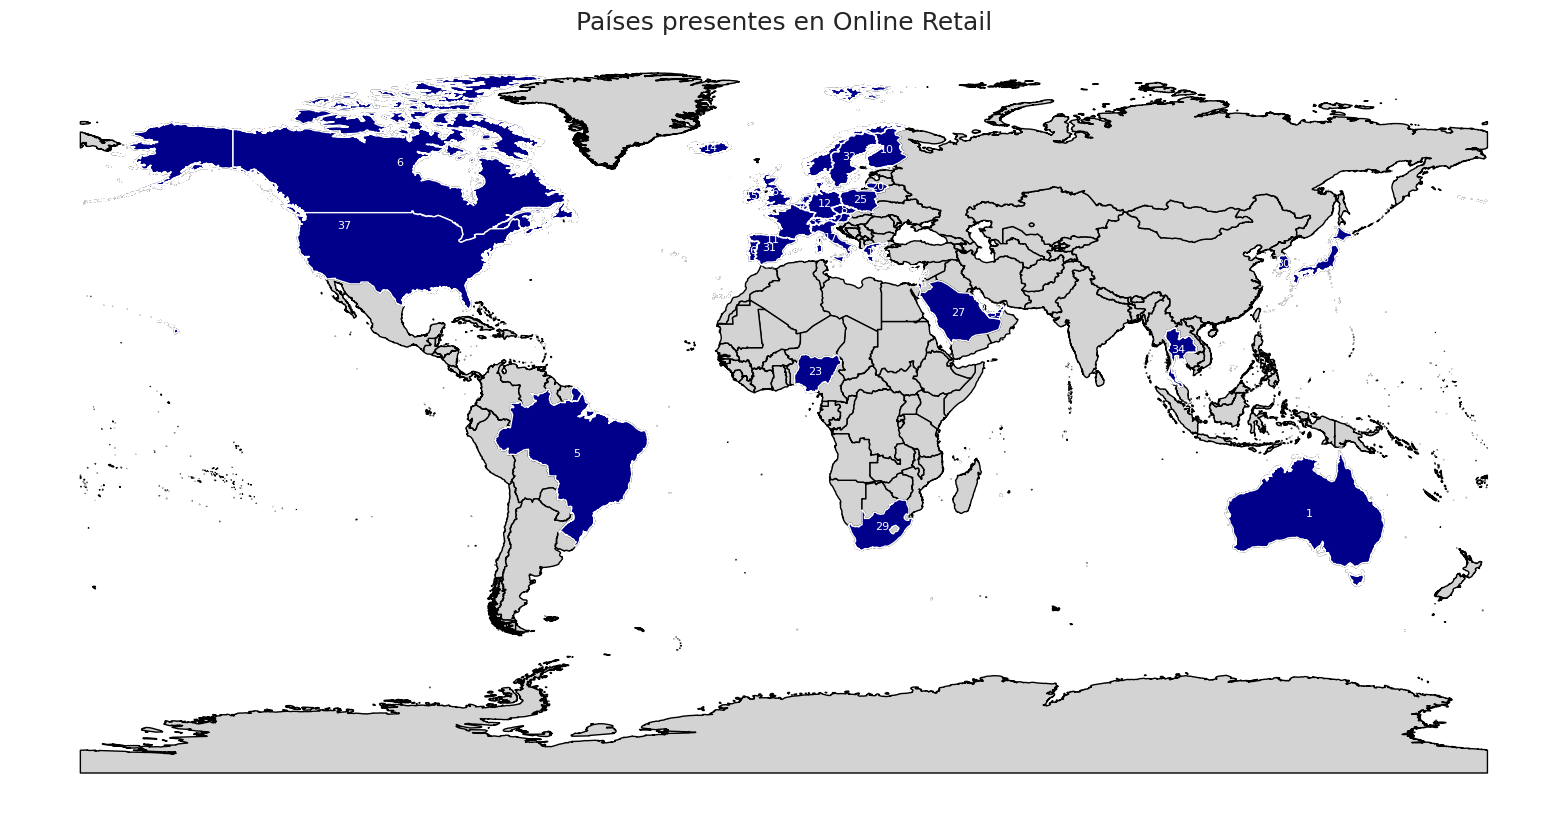

In [ ]:
countries = onlineRetail['Country'].unique()
world["present"] = world["ADMIN"].isin(countries)
world_present = world[world["present"]].copy()
world_present = world_present.sort_values("ADMIN").reset_index(drop=True)
world_present['label'] = range(1, len(world_present) + 1)
fig, ax = plt.subplots(figsize=(20, 10))
world.plot(ax=ax, color="lightgray", edgecolor="black")
world_present.plot(ax=ax, color="darkblue")
for index, row in world_present.iterrows():
    centroid = row.geometry.centroid
    ax.annotate(
        text=int(row['label']),
        xy=(centroid.x, centroid.y),
        ha='center', va='center',
        fontsize=8, color='white'
    )

plt.title("Países presentes en Online Retail", fontsize=18)
plt.axis("off")
plt.show()

# Mostrar asignación en consola (alfabética)
#print("\nAsignación de números a países (orden alfabético):")
#for index, row in world_present.iterrows():
#    print(f"{int(row['label'])}: {row['ADMIN']}")

#Verificar faltantes (si es que aún hay)
#world_countries_list = world['ADMIN'].unique().tolist()
#countries_not_in_world = [c for c in countries if c not in world_countries_list]
#print(f"\nPaíses en onlineRetail no encontrados en el mapa mundial GeoDataFrame: {countries_not_in_world}")

### Análisis describe

In [ ]:
onlineRetail[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,778793.000000,778793.000000
mean,13.492603,3.218415
std,145.914650,29.688027
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,10953.500000


### Análisis de outlaiers

Analizamos los outliers a nivel de cantidad

In [ ]:
onlineRetail_for_plotting = onlineRetail.copy()

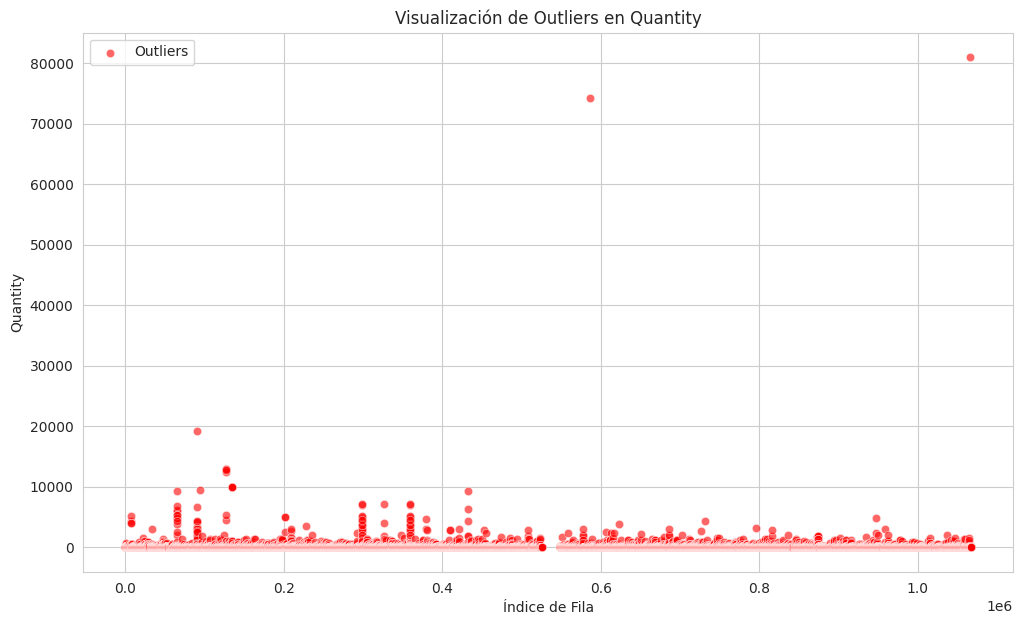

In [ ]:
if 'onlineRetail_for_plotting' not in locals() and 'onlineRetail' in locals():
    onlineRetail_for_plotting = pd.read_csv(rutaArchivo, encoding='ISO-8859-1')
    onlineRetail_for_plotting.dropna(inplace=True)
    onlineRetail_for_plotting.query("Quantity > 0 and UnitPrice > 0", inplace=True)
# Calcular outliers en Quantity
Q1_q = onlineRetail_for_plotting['Quantity'].quantile(0.25)
Q3_q = onlineRetail_for_plotting['Quantity'].quantile(0.75)
IQR_q = Q3_q - Q1_q
lower_bound_q = Q1_q - 1.5 * IQR_q
upper_bound_q = Q3_q + 1.5 * IQR_q
outliers_q = onlineRetail_for_plotting[(onlineRetail_for_plotting['Quantity'] < lower_bound_q) |
                                       (onlineRetail_for_plotting['Quantity'] > upper_bound_q)]
plt.figure(figsize=(12, 7))
sns.scatterplot(x=outliers_q.index, y=outliers_q['Quantity'], color='red', label='Outliers', alpha=0.6)
plt.title('Visualización de Outliers en Quantity')
plt.xlabel('Índice de Fila')
plt.ylabel('Quantity')
plt.legend()
plt.show()

Analizamos los outliers a nivel de precio unitario

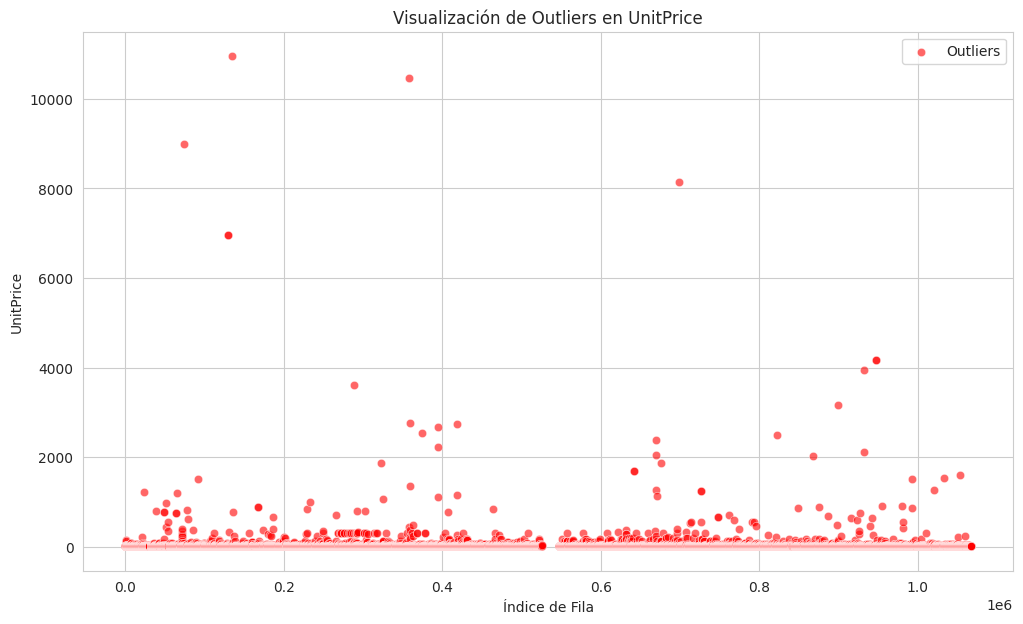

In [ ]:
if 'onlineRetail_for_plotting' not in locals() and 'onlineRetail' in locals():
    onlineRetail_for_plotting = pd.read_csv(rutaArchivo, encoding='ISO-8859-1')
    onlineRetail_for_plotting.dropna(inplace=True)
    onlineRetail_for_plotting.query("Quantity > 0 and UnitPrice > 0", inplace=True)
Q1_p = onlineRetail_for_plotting['UnitPrice'].quantile(0.25)
Q3_p = onlineRetail_for_plotting['UnitPrice'].quantile(0.75)
IQR_p = Q3_p - Q1_p
lower_bound_p = Q1_p - 1.5 * IQR_p
upper_bound_p = Q3_p + 1.5 * IQR_p
outliers_p = onlineRetail_for_plotting[(onlineRetail_for_plotting['UnitPrice'] < lower_bound_p) |
                                       (onlineRetail_for_plotting['UnitPrice'] > upper_bound_p)]
plt.figure(figsize=(12, 7))
sns.scatterplot(x=outliers_p.index, y=outliers_p['UnitPrice'], color='red', label='Outliers', alpha=0.6)
plt.title('Visualización de Outliers en UnitPrice')
plt.xlabel('Índice de Fila')
plt.ylabel('UnitPrice')
plt.legend()
plt.show()

Analizamos los valores normales a nivel de cantidad

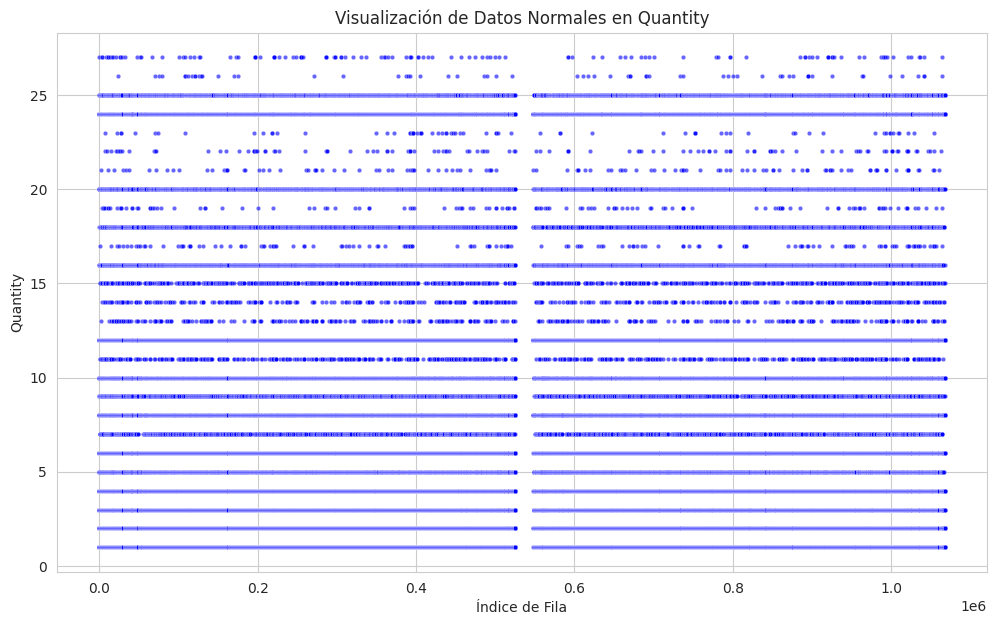

In [ ]:
Q1_q = onlineRetail_for_plotting['Quantity'].quantile(0.25)
Q3_q = onlineRetail_for_plotting['Quantity'].quantile(0.75)
IQR_q = Q3_q - Q1_q
lower_bound_q = Q1_q - 1.5 * IQR_q
upper_bound_q = Q3_q + 1.5 * IQR_q
normal_q = onlineRetail_for_plotting[(onlineRetail_for_plotting['Quantity'] >= lower_bound_q) &
                                     (onlineRetail_for_plotting['Quantity'] <= upper_bound_q)]
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x=normal_q.index, y=normal_q['Quantity'],
    alpha=0.6, color='blue', s=10, legend=False
)
plt.title('Visualización de Datos Normales en Quantity')
plt.xlabel('Índice de Fila')
plt.ylabel('Quantity')
plt.show()

Analizamos los valores normales a nivel de precio unitario

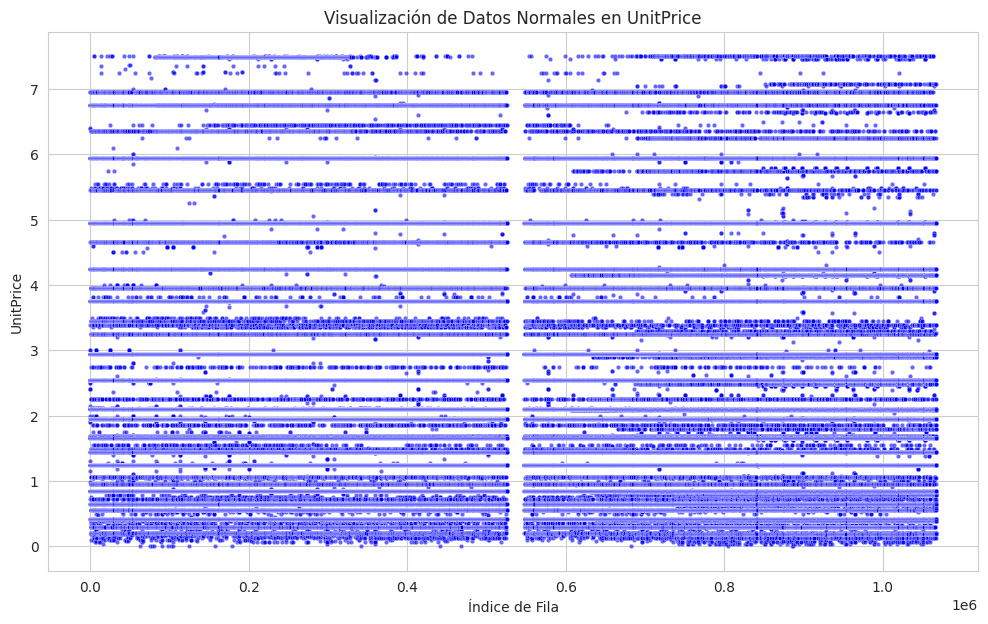

In [ ]:
Q1_p = onlineRetail_for_plotting['UnitPrice'].quantile(0.25)
Q3_p = onlineRetail_for_plotting['UnitPrice'].quantile(0.75)
IQR_p = Q3_p - Q1_p
lower_bound_p = Q1_p - 1.5 * IQR_p
upper_bound_p = Q3_p + 1.5 * IQR_p
normal_p = onlineRetail_for_plotting[(onlineRetail_for_plotting['UnitPrice'] >= lower_bound_p) &
                                     (onlineRetail_for_plotting['UnitPrice'] <= upper_bound_p)]
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x=normal_p.index, y=normal_p['UnitPrice'],
    alpha=0.6, color='blue', s=10, legend=False  # leyenda desactivada
)
plt.title('Visualización de Datos Normales en UnitPrice')
plt.xlabel('Índice de Fila')
plt.ylabel('UnitPrice')
plt.show()

### Outlaiers según (Chen, Sain & Guo, 2012)

#### Limitaciones identificadas

En el análisis de segmentación de clientes con el modelo RFM, los autores utilizan el método **IQR (Interquartile Range)** para la detección y eliminación de valores atípicos (outliers).  
Si bien este procedimiento es estándar en estadística, se identifican algunas limitaciones que vale la pena señalar:

1. **Falta de justificación frente a otros métodos**  
   El paper no explica por qué se seleccionó específicamente el método IQR en lugar de otros enfoques posibles, como el método Z-score, técnicas de Winsorización o incluso algoritmos basados en machine learning (Isolation Forest, DBSCAN, etc.).  
   Esto limita la claridad sobre la robustez de la elección metodológica.

2. **Ausencia de consideraciones de negocio**  
   En el contexto del retail online, no todos los valores extremos deben eliminarse automáticamente.  
   Por ejemplo:
   - Una compra con cantidades excepcionalmente altas podría corresponder a un cliente mayorista o corporativo.  
   - Precios unitarios elevados podrían estar asociados a productos de lujo o segmentos VIP.  
   El paper no aborda este punto, y al aplicar el IQR de manera automática existe el riesgo de eliminar información de alto valor estratégico.

3. **No se realiza comparación con otros métodos de outliers**  
   Los autores no comparan los resultados del IQR con otros enfoques de detección de outliers. Una comparación habría permitido evaluar:
   - Cómo varían los segmentos de clientes según el método de limpieza elegido.  
   - Si los valores atípicos realmente eran ruido o si representaban patrones de negocio relevantes.

Función del paper 3

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

Probamos la normalización

In [ ]:
columnas_numericas = ['Quantity', 'UnitPrice']
df_clean = onlineRetail.copy()

for columna in columnas_numericas:
    df_clean = remove_outlier(df_clean, columna)
    print(f"Outliers eliminados de {columna}")

Outliers eliminados de Quantity
Outliers eliminados de UnitPrice


Verificar que no existan nulos en el nuevo dataset de prueba

In [ ]:
verificarNulos(df_clean)

,Columna,NumeroDeValoresNulos
0,InvoiceNo,0
1,StockCode,0
2,Description,0
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,0
7,Country,0


Verificar que no existan filas duplicadas en el nuevo dataset de prueba

In [ ]:
mostrarDuplicados(df_clean)

Cantidad de filas duplicadas: 0


Probamos

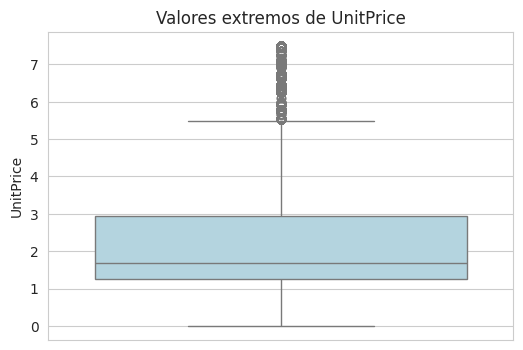

Valor mínimo de UnitPrice: 0.001
Valor máximo de UnitPrice: 7.49


In [ ]:
visualizar_minmax_box(df_clean, "UnitPrice")

Probamos

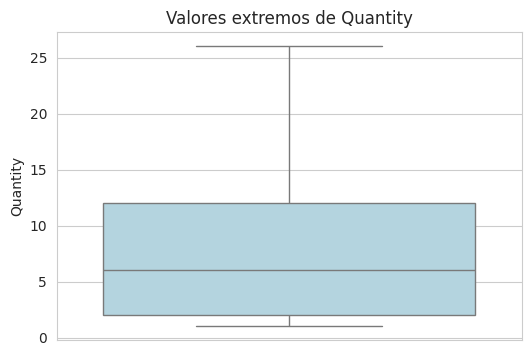

Valor mínimo de Quantity: 1
Valor máximo de Quantity: 26


In [ ]:
visualizar_minmax_box(df_clean, "Quantity")

En conclusión, siguiendo la perspectiva de Khandelwal (2021), en el contexto del retail online no es adecuado eliminar de manera automática todos los valores atípicos, ya que muchos de ellos no son simples errores estadísticos sino indicadores de clientes mayoristas, segmentos VIP o productos de lujo. Por ello, más que aplicar un filtrado mecánico, es fundamental analizar los outliers en función de su valor de negocio, pues conservarlos permite descubrir patrones de consumo diferenciados y diseñar estrategias de marketing más precisas.


## Guardado del dataset

Guardamos el dataset limpio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
output_dir = "/content/drive/MyDrive/datasets/online retail/csv/"
output_file = os.path.join(output_dir, "online_retail_II_cleaned.csv")
onlineRetail.to_csv(output_file, index=False)
print(f"DataFrame Online Retail guardado exitosamente en: {output_file}")

DataFrame Online Retail guardado exitosamente en: /content/drive/MyDrive/datasets/online retail/csv/online_retail_II_cleaned.csv


In [ ]:
onlineRetail2 = pd.read_csv("/content/drive/MyDrive/datasets/online retail/csv/online_retail_II_cleaned.csv", encoding='ISO-8859-1')

In [ ]:
onlineRetail2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
verificarNulos(onlineRetail2)

,Columna,NumeroDeValoresNulos
0,InvoiceNo,0
1,StockCode,0
2,Description,0
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,0
7,Country,0


In [ ]:
mostrarDuplicados(onlineRetail2)

Cantidad de filas duplicadas: 0


In [ ]:
mostrarCantidadNegativa(onlineRetail2)

,Quantity


In [ ]:
mostrarPrecioUnitarioNegativo(onlineRetail2)

,UnitPrice


In [ ]:
initial_rows = onlineRetail2.shape[0]
onlineRetail2['InvoiceNo'] = onlineRetail2['InvoiceNo'].astype(str)
rows_to_remove = onlineRetail2['InvoiceNo'].str.startswith('C', na=False).sum()
if rows_to_remove == 0:
    print("No hay facturas canceladas (InvoiceNo comenzando con 'C').")
else:
    onlineRetail2 = onlineRetail2[~onlineRetail2['InvoiceNo'].str.startswith('C', na=False)]
    rows_after_filtering = onlineRetail2.shape[0]
    rows_removed = initial_rows - rows_after_filtering
    print(f"Se eliminaron {rows_removed} filas con InvoiceNo comenzando con 'C'.")

No hay facturas canceladas (InvoiceNo comenzando con 'C').


In [ ]:
onlineRetail2.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


## Conclusiones del Análisis de Limpieza de Datos

Después de realizar una exploración inicial y limpieza de los datos del dataset "Online Retail", se identificaron y trataron varios problemas:

*   **Datos Duplicados:** Se encontraron y eliminaron 34335 filas duplicadas.
*   **Valores Faltantes:** Las columnas `Description` y `CustomerID` presentaban valores nulos. Se decidió eliminar las filas con `CustomerID` nulo, ya que sin esta información no es posible identificar a los clientes para análisis posteriores como la segmentación RFM. Esto resultó en la eliminación de 235151 filas.
*   **Datos Inconsistentes:**
    *   Se identificaron transacciones con `InvoiceNo` que comenzaban con 'C', indicando cancelaciones. Estas filas (18390 en total) fueron eliminadas ya que representan transacciones no completadas.
    *   Se verificaron valores negativos o cero en `Quantity` y `UnitPrice`. Todas las filas con `Quantity` menor o igual a 0 y `UnitPrice` menor o igual a 0 fueron eliminadas.
    *   Se normalizaron algunos nombres de países inconsistentes (EIRE a Ireland, RSA a South Africa, Korea a South Korea, Czech Republic a Czechia) y se eliminaron registros genéricos o no especificados (`Channel Islands`, `Unspecified`, `European Community`, `West Indies`).
*   **Outliers:** Se realizó un análisis de outliers en las columnas `Quantity` y `UnitPrice` utilizando el método del Rango Intercuartílico (IQR). Si bien este método es común para identificar valores extremos, se concluyó que **no es adecuado eliminar de manera automática todos los valores atípicos en este contexto de retail online**. Esto se debe a que muchos de estos valores atípicos pueden representar información valiosa sobre clientes mayoristas, compras de alto valor o productos de lujo, los cuales son importantes para identificar segmentos de clientes de alto valor y diseñar estrategias de marketing específicas. Por lo tanto, en lugar de una eliminación mecánica, se enfatiza la necesidad de analizar estos outliers desde una perspectiva de negocio para no perder información estratégica.

En resumen, se ha realizado un proceso de limpieza exhaustivo para asegurar que el dataset sea confiable para análisis posteriores, como la segmentación de clientes, manteniendo la consideración de que ciertos valores atípicos pueden ser relevantes desde un punto de vista de negocio.